<a href="https://colab.research.google.com/github/jessejhudson1989/Data-Science/blob/main/Stock_Price_Prediction_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2020-01-02  72.796005  75.087502  75.150002  73.797501  74.059998  135480400
2020-01-03  72.088287  74.357498  75.144997  74.125000  74.287498  146322800
2020-01-06  72.662735  74.949997  74.989998  73.187500  73.447502  118387200
2020-01-07  72.320976  74.597504  75.224998  74.370003  74.959999  108872000
2020-01-08  73.484352  75.797501  76.110001  74.290001  74.290001  132079200
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.1127
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0094
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0033
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0027
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0023
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - l

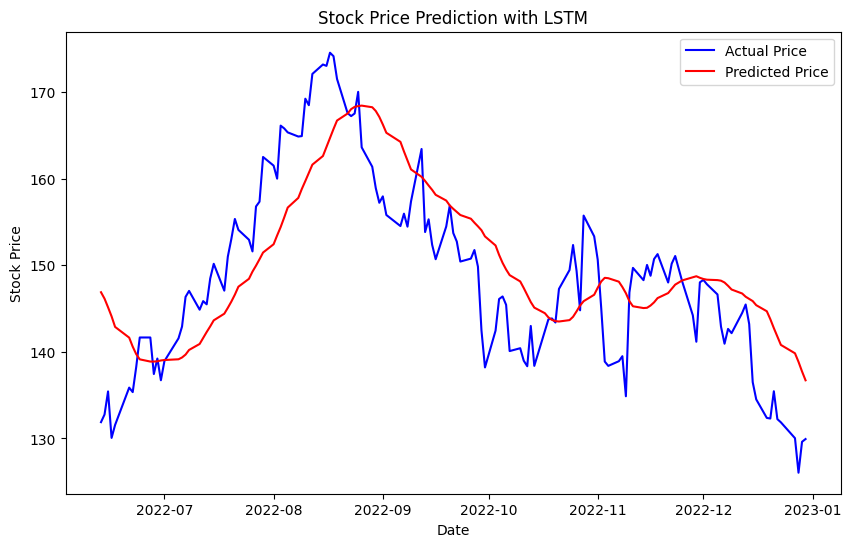

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense #Long Short-Term Memory

#Download Stock Data
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
print(data.head())

close_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

def create_dataset(data, time_step=60):
  X, y = [], []
  for i in range(len(data) - time_step):
    X.append(data[i:(i + time_step), 0])
    y.append(data[i + time_step, 0])
  return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size + 60:], close_prices[train_size + 60:], color='blue', label='Actual Price')
plt.plot(data.index[train_size + 60:], predictions, color='red', label='Predicted Price')
plt.title('Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
